In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop_duplicates(keep=False, inplace=True, subset=['Patient','Weeks']) #there are 14 duplicates

In [4]:
patients = train.Patient.unique()

In [5]:
LinearData = pd.DataFrame(index=patients, columns= ['slope', 'intersect'])

In [6]:
for pat in patients:
    x = np.array(train[train.Patient == pat]['Weeks'].to_list()).reshape(-1,1)
    y = np.array(train[train.Patient == pat]['FVC'].to_list())
    lr = LinearRegression().fit(x,y)
    LinearData.loc[pat].slope = lr.coef_[0]
    LinearData.loc[pat].intersect = lr.intercept_
    
LinearData.to_csv('patient_slope_intercept.csv')

In [7]:
LinearData.head()

,slope,intersect
ID00007637202177411956430,-3.16713,2174.42
ID00009637202177434476278,-9.37996,3821.79
ID00010637202177584971671,-17.0428,3311.69
ID00011637202177653955184,-4.54893,3487.08
ID00012637202177665765362,-8.54308,3774.03


(array([ 1.,  0.,  1.,  2.,  0.,  1.,  1.,  1.,  3.,  3.,  2.,  3.,  7.,
        14., 10., 15., 23., 20., 23., 21., 11.,  4.,  4.,  0.,  2.,  1.,
         1.,  1.,  0.,  1.]),
 array([-28.18257491675915, -26.753735361805727, -25.324895806852304,
        -23.896056251898877, -22.467216696945453, -21.03837714199203,
        -19.609537587038606, -18.180698032085182, -16.751858477131755,
        -15.323018922178333, -13.894179367224908, -12.465339812271484,
        -11.03650025731806, -9.607660702364637, -8.17882114741121,
        -6.749981592457786, -5.321142037504362, -3.8923024825509387,
        -2.463462927597515, -1.0346233726440879, 0.39421618230933575,
        1.8230557372627594, 3.251895292216183, 4.68073484716961,
        6.10957440212303, 7.5384139570764575, 8.967253512029878,
        10.396093066983305, 11.824932621936732, 13.253772176890152,
        14.682611731843576], dtype=object),
 <a list of 30 Patch objects>)

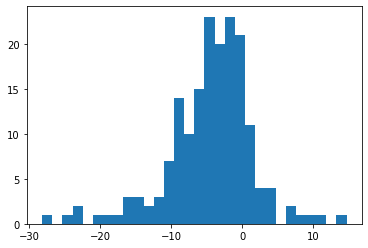

In [8]:
plt.hist(LinearData.slope, bins=30)

In [9]:
print(LinearData.slope.min(),LinearData.slope.max())

-28.18257491675915 14.682611731843576


In [10]:
print(LinearData.intersect.min(),LinearData.intersect.max())

1063.4501144913313 5919.045454545454
